In [5]:
import re
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficiency. 
import matplotlib.pyplot as plt
import seaborn as sns
from field_data_processor import FieldDataProcessor
# from weather_data_processor import WeatherDataProcessor
import logging 

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

config_params = {
    "sql_query": """
            SELECT *
            FROM geographic_features
            LEFT JOIN weather_features USING (Field_ID)
            LEFT JOIN soil_and_crop_features USING (Field_ID)
            LEFT JOIN farm_management_features USING (Field_ID)
            """,
    "db_path": 'sqlite:///Maji_Ndogo_farm_survey_small.db',
    "columns_to_rename": {'Annual_yield': 'Crop_type', 'Crop_type': 'Annual_yield'},
    "values_to_rename": {'cassaval': 'cassava', 'wheatn': 'wheat', 'teaa': 'tea'},
    "weather_csv_path": "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Weather_station_data.csv",
    "weather_mapping_csv": "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Weather_data_field_mapping.csv",
    "regex_patterns" : {
            'Rainfall': r'(\d+(\.\d+)?)\s?mm',
            'Temperature': r'(\d+(\.\d+)?)\s?C',
            'Pollution_level': r'=\s*(-?\d+(\.\d+)?)|Pollution at \s*(-?\d+(\.\d+)?)'
            },
}
# Ignoring the field data for now.
field_processor = FieldDataProcessor(config_params)
field_processor.process()
field_df = field_processor.df

dataset = field_df.drop("Weather_station", axis=1)

2024-11-02 19:42:34,007 - data_ingestion - INFO - Database engine created successfully.
2024-11-02 19:42:34,273 - data_ingestion - INFO - Query executed successfully.
2024-11-02 19:42:34,275 - field_data_processor.FieldDataProcessor - INFO - Sucessfully loaded data.
2024-11-02 19:42:34,282 - field_data_processor.FieldDataProcessor - INFO - Swapped columns: Annual_yield with Crop_type
2024-11-02 19:42:36,530 - data_ingestion - INFO - CSV file read successfully from the web.


In [2]:
dataset

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.8,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,cassava,0.507595


In [3]:
# Validate the data                                         
# !pip install pytest

dataset.to_csv('sampled_field_df.csv', index=False)

!pytest validate_data.py -v

import os# Define the file paths
field_csv_path = 'sampled_field_df.csv'

# Delete sampled_field_df.csv if it exists
if os.path.exists(field_csv_path):
    os.remove(field_csv_path)
    print(f"Deleted {field_csv_path}")
else:
    print(f"{field_csv_path} does not exist.")  #These is done to ensure the integrity of our dataset and that the data is still as we expect it to be

============================= test session starts =============================
platform win32 -- Python 3.9.18, pytest-7.4.0, pluggy-1.0.0 -- C:\ProgramData\Anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\HP\Documents\DSCourse\Regression
plugins: anyio-3.5.0
collecting ... collected 4 items

validate_data.py::test_read_field_dataframe_shape PASSED                 [ 25%]
validate_data.py::test_field_dataframe_columns PASSED                    [ 50%]
validate_data.py::test_field_dataframe_non_negative_elevation PASSED     [ 75%]
validate_data.py::test_crop_types_are_valid PASSED                       [100%]

============================= 4 passed in 34.68s ==============================
Deleted sampled_field_df.csv


## Visualising the relationship

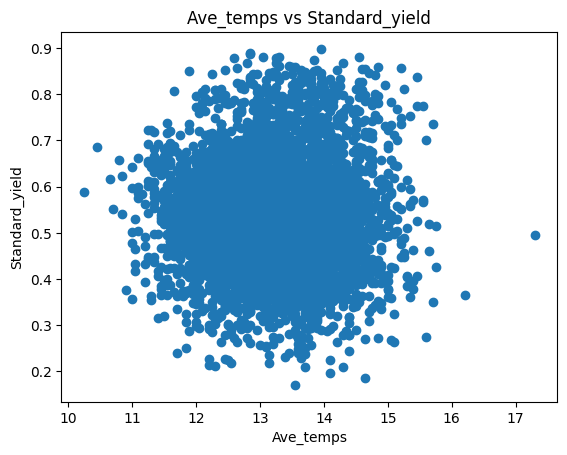

In [6]:
# my goal here is to determine whether any of the features in our dataset are influencing the Standard_yield of a farm
plt.scatter(dataset['Ave_temps'], dataset['Standard_yield'])
plt.xlabel('Ave_temps')
plt.ylabel('Standard_yield')
plt.title('Ave_temps vs Standard_yield')
plt.show()

In [8]:
from scipy.stats import pearsonr #this is used to calculate the Pearson correlation coefficient
def get_correlation(df, col1, col2):
    """
    Calculates the Pearson correlation coefficient between two columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    col1 (str): The name of the first column.
    col2 (str): The name of the second column.

    Returns:
    float: Pearson correlation coefficient between the two specified columns.
    """
    correlation, _ = pearsonr(df[col1], df[col2])
    
    return correlation

In [9]:
correlation = get_correlation(dataset,'Ave_temps','Standard_yield')
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.006785950289020218


A correlation value of approximately 0.0068 is extremely low, close to zero. This suggests that there is effectively no linear relationship between the variables avg_temp and standard_yield.

## Pollution as a predictor

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
def fit_linear_regression_model(df, pollution_col, yield_col):
    """
    Fits a linear regression model to predict crop yield based on pollution levels.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    pollution_col (str): The name of the column representing pollution levels.
    yield_col (str): The name of the column representing crop yield.

    Returns:
    tuple: A tuple containing:
        - ml (LinearRegression): The fitted linear regression model.
        - predictions (ndarray): Predicted values of crop yield based on the model.
        - y (ndarray): Actual crop yield values, flattened.
    """

    X = df[[pollution_col]].values
    y = df[[yield_col]].values
    ml = LinearRegression()
    ml.fit(X, y)

    predictions = ml.predict(X)

    return ml, predictions, y.ravel()

In [15]:
model, predictions, y_values = fit_linear_regression_model(dataset, 'Pollution_level', 'Standard_yield')
print(f"Model: {model}")
print(f"Predictions: {predictions}")
print(f"Actual Y-Values: {y_values}")

Model: LinearRegression()
Predictions: [[0.5540956 ]
 [0.50920888]
 [0.51515565]
 ...
 [0.56626844]
 [0.56626844]
 [0.52896886]]
Actual Y-Values: [0.57796436 0.48630219 0.64964738 ... 0.80077564 0.5075954  0.4530639 ]


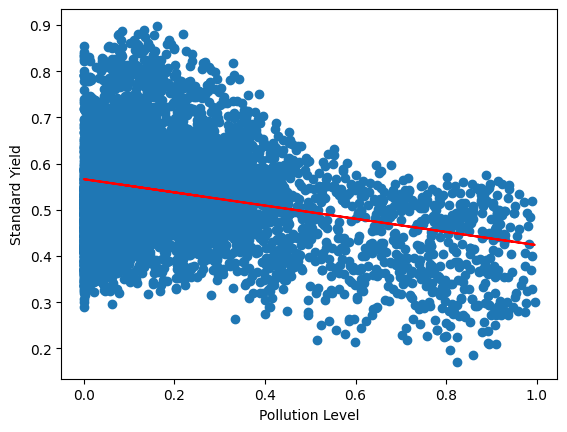

In [16]:
X = dataset[['Pollution_level']]
y = dataset['Standard_yield']

plt.scatter(X, y, label='Data')
plt.plot(X, predictions, color='red', label='Regression line')
plt.xlabel('Pollution Level')
plt.ylabel('Standard Yield')
plt.show()

In [17]:
Pollution_correlation = get_correlation(dataset,'Pollution_level','Standard_yield')
print("Pearson correlation coefficient:", Pollution_correlation)

Pearson correlation coefficient: -0.2857609646210545


A correlation coefficient of approximately −0.286 indicates a moderate negative linear relationship between pollution_level and standard_yield.
i.e, as the pollution_level increases, the standard_yield reduces.

In [18]:
def get_slope_intercept(model): #examining the slope and intercept will help get a better understanding of our model.
    """
    Extracts the slope and intercept from a fitted linear regression model.

    Parameters:
    model (LinearRegression): The fitted linear regression model from scikit-learn.

    Returns:
    tuple: A tuple containing:
        - slope (ndarray): The slope of the regression line (coefficient).
        - intercept (float): The y-intercept of the regression line.
    """
    slope = model.coef_
    intercept = float(model.intercept_)

    return slope, intercept

In [19]:
slope, intercept = get_slope_intercept(model)
print("Slope:", slope)
print("Intercept:", intercept)

Slope: [[-0.14276177]]
Intercept: 0.566268441539338


C:\Users\HP\AppData\Local\Temp\ipykernel_9596\286512895.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


The slope of −0.1428 indicates that for each unit increase in the pollution_level, the standard_yield decreases by approximately 
0.1428 units.
The intercept value of 0.5663 represents the expected value of the standard_yield when the pollution_level is zero

## Evaluating pollution's predictive power

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
def calculate_evaluation_metrics(predictions, y_values):
    """
    Calculates various evaluation metrics to assess the performance of a regression model.

    Parameters:
    predictions (ndarray): Predicted values from the regression model.
    y_values (ndarray): Actual observed values for comparison.

    Returns:
    tuple: A tuple containing:
        - r2 (float): R² score, representing the proportion of variance explained by the model.
        - mae (float): Mean Absolute Error, indicating the average absolute differences between predicted and actual values.
        - mse (float): Mean Squared Error, measuring the average of the squares of the errors.
        - rmse (float): Root Mean Squared Error, the square root of MSE, representing the average magnitude of error.
    """
    r2 = r2_score(y_values, predictions)
    mae = mean_absolute_error(y_values, predictions)
    mse = mean_squared_error(y_values, predictions)
    rmse = np.sqrt(mse)

    return r2, mae, mse, rmse


In [24]:
evaluation_metrics = calculate_evaluation_metrics(predictions, y_values)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

Evaluation Metrics:
R-squared: 0.08165932890115568
MAE: 0.08554642090904993
MSE: 0.011477732254034844
RMSE: 0.10713417873878926


Overall, these metrics indicate that the model is not performing particularly well, especially given the low 
𝑅2 value, which suggests that the pollution level alone does not adequately explain the variation in crop yield.

## Train-test split

To ensure that my model is not just memorizing the data but is understanding it, i will use the train-test split and introduce new data

In [25]:
from sklearn.model_selection import train_test_split

In [31]:
def data_train_test_split(df, pollution_col, yield_col):
    """
    Splits the dataset into training and testing sets for a regression model.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    pollution_col (str): The name of the column representing pollution levels (independent variable).
    yield_col (str): The name of the column representing crop yield (dependent variable).

    Returns:
    tuple: A tuple containing:
        - X_train (pd.DataFrame): Training set of pollution levels.
        - X_test (pd.DataFrame): Testing set of pollution levels.
        - y_train (pd.DataFrame): Training set of crop yield values.
        - y_test (pd.DataFrame): Testing set of crop yield values.
    """
    X = df[[pollution_col]]
    y = df[[yield_col]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [34]:
X_train, X_test, y_train, y_test = data_train_test_split(dataset, 'Pollution_level', 'Standard_yield')
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (4523, 1), X_test shape: (1131, 1)
y_train shape: (4523, 1), y_test shape: (1131, 1)


In [35]:
def train_split_linear_regression_model(X_train, X_test, y_train, y_test):
    """
    Trains a linear regression model on the training data and makes predictions on the test data.

    Parameters:
    X_train (pd.DataFrame): The training set of independent variable(s) (e.g., pollution levels).
    X_test (pd.DataFrame): The testing set of independent variable(s).
    y_train (pd.DataFrame): The training set of dependent variable(s) (e.g., crop yield).
    y_test (pd.DataFrame): The testing set of dependent variable(s).

    Returns:
    tuple: A tuple containing:
        - ml (LinearRegression): The fitted linear regression model.
        - predictions (ndarray): Predicted values for the testing set.
        - y_test (pd.DataFrame): Actual values for the testing set.
    """
    ml = LinearRegression()
    ml.fit(X_train, y_train)

    predictions = ml.predict(X_test)

    return ml, predictions, y_test

In [36]:
train_test_model, predictions_test, y_test = train_split_linear_regression_model(X_train, X_test, y_train, y_test)
print(f"Train-Test Model: {train_test_model}")
print(f"Test Predictions: {predictions_test}")
print(f"Test Actual Y-Values: {y_test}")

Train-Test Model: LinearRegression()
Test Predictions: [[0.56412206]
 [0.56167249]
 [0.55638552]
 ...
 [0.53129108]
 [0.53868457]
 [0.56431394]]
Test Actual Y-Values:       Standard_yield
4816        0.446290
5096        0.650771
4706        0.531284
1499        0.516429
3544        0.555724
...              ...
3982        0.540212
4952        0.670387
1071        0.353658
718         0.535224
4103        0.470315

[1131 rows x 1 columns]


In [37]:
evaluation_metrics = calculate_evaluation_metrics(predictions_test, y_test)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

Evaluation Metrics:
R-squared: 0.08065722992150848
MAE: 0.087949421197475
MSE: 0.012250634233355656
RMSE: 0.11068258324305436
